## Pre-processing and statistical analysis of the theme of the gender of the characters in the movies with the tropes of the movies


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import datetime as dt


In [2]:
# open the files
movie_df = pd.read_csv('movie_metadata.csv', sep=',', encoding='utf-8', on_bad_lines='skip')
char_df=pd.read_csv('character_metadata.csv', sep=',', encoding='utf-8', on_bad_lines='skip')

In [3]:
movie_df.sample(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Languages,Countries,Genres
10349,31799966,/m/075qqrl,Étoile,1988,NaN,NaN,{},{'/m/03rjj': 'Italy'},{'/m/03npn': 'Horror'},[],['Italy'],['Horror']


In [4]:
char_df.sample(1)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
85533,2585223,/m/07psnr,2000-12-29,Annie,1965-11-24,F,1.524,/m/03lmx1,Shirley Henderson,35.0,/m/0bfmztr,/m/0b_x_0w,/m/071ynp


In [5]:
#open the file tvtropes.cluster.txt

# Specify the file path
file_path = 'tvtropes.clusters.txt'

#Initiatlize lists to store data
tropes=[]
character = []
movie =[]
id=[]
actor=[]

# Open the file in read mode
with open(file_path, 'r') as file:
    # Iterate through each line in the file
    for line in file:
        # Split the line into two parts based on the tab character
        parts = line.strip().split('\t')
        
        # The first part is the string, and the second part is the JSON object
        string_part = parts[0]
        json_part = parts[1]

        # Load the JSON object
        try:
            json_object=json.loads(json_part)

            # access specific field in the JSPN object if needed
            character.append(json_object['char'])
            movie.append(json_object['movie'])
            id.append(json_object['id'])
            actor.append(json_object['actor'])

        except json.JSONDecodeError as e:
            print("Error decoding JSON:", e)

        # Append data to lists
        tropes.append(string_part)

# Create a DataFrame
data = {'Tropes': tropes, 'Character': character, 'Movie': movie, 'character/actor map ID': id, 'Actor': actor}
tvtropes = pd.DataFrame(data)
        

In [6]:
tvtropes.nunique()

Tropes                     72
Character                 434
Movie                     383
character/actor map ID    447
Actor                     350
dtype: int64

## Data scale visualisation

In [7]:
# Check for unique values in dataframes
print('Character Dataframe')
print(char_df.nunique())
print('Movie Dataframe'), print(movie_df.nunique())
print('Tvtropes Dataframe'), print(tvtropes.nunique())

Character Dataframe
Wikipedia movie ID                  64330
Freebase movie ID                   64330
Movie release date                  18476
Character name                     126629
Actor date of birth                 29494
Actor gender                            2
Actor height                          221
Actor ethnicity                       479
Actor name                         134078
Actor age at movie release            155
Freebase character/actor map ID    450669
Freebase character ID              183435
Freebase actor ID                  135760
dtype: int64
Movie Dataframe
Wikipedia movie ID          81741
Freebase movie ID           81741
Movie name                  75478
Movie release date          20389
Movie box office revenue     7362
Movie runtime                 597
Movie languages              1817
Movie countries              2124
Movie genres                23817
Languages                    1817
Countries                    2124
Genres                      238

(None, None)

Nb of movies in movie df > char df > tv tropes

# Character analysis

In [8]:
# Checking null values in character dataframe
print('Character Dataframe')
print(char_df.isnull().sum())

Character Dataframe
Wikipedia movie ID                      0
Freebase movie ID                       0
Movie release date                   9995
Character name                     257875
Actor date of birth                106145
Actor gender                        45609
Actor height                       295845
Actor ethnicity                    344611
Actor name                           1228
Actor age at movie release         158113
Freebase character/actor map ID         0
Freebase character ID              257865
Freebase actor ID                     815
dtype: int64


In [9]:
# Drop null values in gender column
char_df.dropna(subset='Actor gender', inplace=True)

In [10]:
# Drop bi-gender association for each actor ID in character
bi_gender=char_df.groupby('Freebase actor ID')['Actor gender'].transform('nunique')>1
char_df= char_df[~bi_gender]


## Analysis of gender distribution over whole movies

In [11]:
#Drop null values for gender columns, drop duplicates in movie ID column 
gender_movie=char_df[['Freebase movie ID','Actor gender']].dropna().drop_duplicates(subset='Freebase movie ID')
print('Unique values')
print(gender_movie.nunique())
print('Null values')
print(gender_movie.isnull().sum())

Unique values
Freebase movie ID    63652
Actor gender             2
dtype: int64
Null values
Freebase movie ID    0
Actor gender         0
dtype: int64


<Axes: title={'center': 'Actor gender distribution over movie dataset'}, xlabel='Actor gender'>

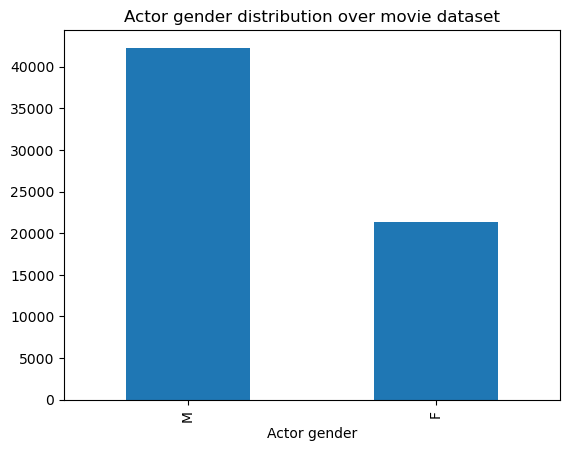

In [12]:
# Print distribution of gender repartition over movies
gender_movie["Actor gender"].value_counts().plot(kind='bar', title='Actor gender distribution over movie dataset')

Male actors play more than women, is it because there is more male actors or because male actors play in more movies than women?
SOLUTION: Observe distribution of gender over actor sample

## Analysis of gender distribution over actors

In [13]:
# Drop null values for gender and actor columns, drop duplicates in actor ID column
gender_actor=char_df[['Freebase actor ID','Actor gender']].dropna().drop_duplicates(subset='Freebase actor ID')
print('Unique values') 
print(gender_actor.nunique())
print('Null values')
print(gender_actor.isnull().sum())

Unique values
Freebase actor ID    97383
Actor gender             2
dtype: int64
Null values
Freebase actor ID    0
Actor gender         0
dtype: int64


<Axes: title={'center': 'Gender distribution over actor set'}, xlabel='Actor gender'>

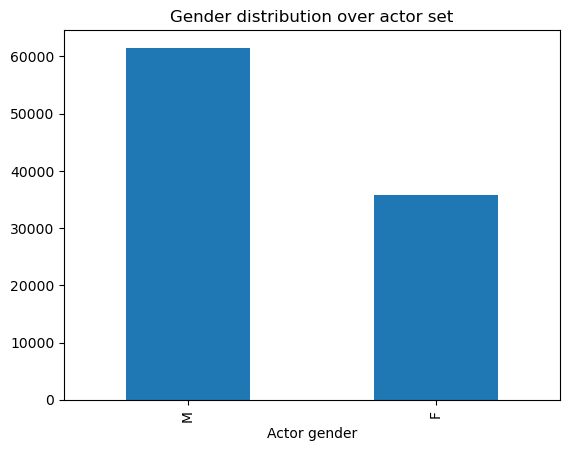

In [14]:
# Print actor gender distribution over actor set
gender_actor["Actor gender"].value_counts().plot(kind='bar', title ='Gender distribution over actor set')

There is more male than female actor in the sample, all observation is going to be influence by this uneven population
Solutions: matching, randomizing samples, 

## Analysis of gender distribution over characters

In [15]:
# Drop null values for gender and character column
# Drop duplicates in character/actor map ID, avoid several interpretations for same character by the same actor
gender_char=char_df[['Character name', 'Actor gender','Freebase character/actor map ID']].dropna().drop_duplicates(subset='Freebase character/actor map ID')
print('Unique values') 
print(gender_char.nunique())
print('Null values')
print(gender_char.isnull().sum())

Unique values
Character name                     122445
Actor gender                            2
Freebase character/actor map ID    185461
dtype: int64
Null values
Character name                     0
Actor gender                       0
Freebase character/actor map ID    0
dtype: int64


<Axes: title={'center': 'Actor gender distribution over characters'}, xlabel='Actor gender'>

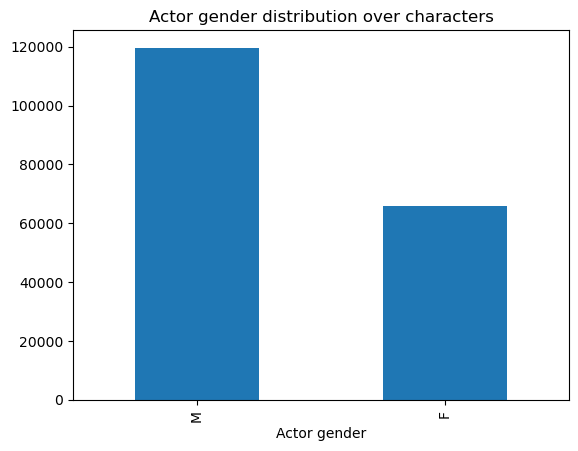

In [16]:
# Print distribution of gender repartition over characters
gender_char["Actor gender"].value_counts().plot(kind='bar', title='Actor gender distribution over characters')

Counted several time same actor 

## Analysis of gender over actor age at movie release

In [92]:
#Drop null values for the age column, drop duplicates in actor ID column
gender_age=char_df[['Freebase actor ID','Actor age at movie release','Actor gender']].dropna().drop_duplicates(subset='Freebase actor ID')
#Drop negative values for age
gender_age['Actor age at movie release']=gender_age['Actor age at movie release'].apply(lambda x: x if x>0 else None).dropna()
print('Unique values')
print(gender_age.nunique())
print('Null values')
print(gender_age.isnull().sum())

Unique values
Freebase actor ID             50956
Actor age at movie release       98
Actor gender                      2
dtype: int64
Null values
Freebase actor ID               0
Actor age at movie release    151
Actor gender                    0
dtype: int64


<Axes: xlabel='Actor gender', ylabel='Actor age at movie release'>

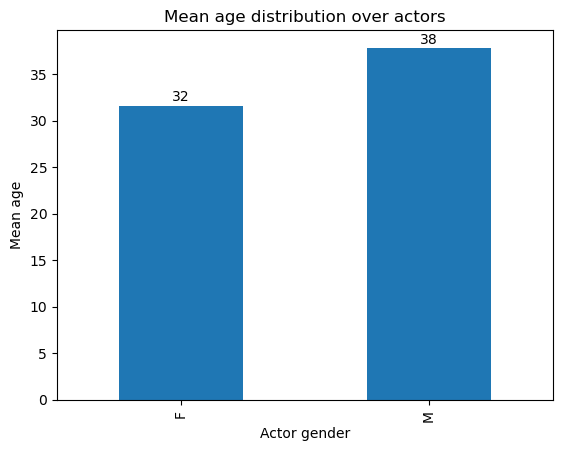

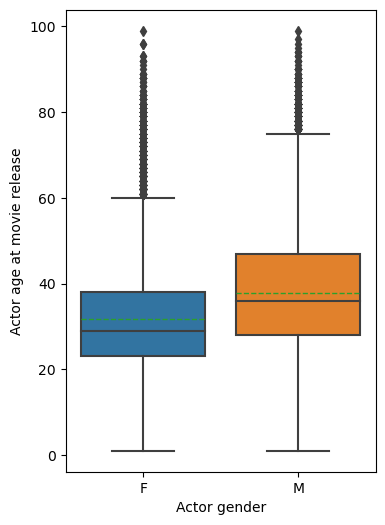

In [97]:
# Print distribution of age repartition over actors
mean_age_df=gender_age.groupby('Actor gender').agg(mean_age=('Actor age at movie release','mean'))
ax= mean_age_df.plot(kind='bar', title='Mean age distribution over actors', legend=False)
plt.ylabel('Mean age')

# Display mean age on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')
    
# Print general statistics about age distribution over actors
plt.figure(figsize=(4,6))
sns.boxplot(x='Actor gender', y='Actor age at movie release', data=gender_age, showmeans=True, meanline=True)

## Analysis of gender repartition over year of birth

In [82]:
# Select data and drop null values and duplicates in actors ID column
gender_birth=char_df[['Freebase actor ID', 'Actor gender','Actor date of birth']].dropna().drop_duplicates(subset='Freebase actor ID')
#change date format for the year only
gender_birth['Actor date of birth']=pd.to_datetime(gender_birth['Actor date of birth'], errors='coerce')
gender_birth['Actor date of birth']=gender_birth['Actor date of birth'].dt.year.dropna()

# Sanity check
print('Unique values')
print(gender_birth.nunique())
print('Null values')
print(gender_birth.isnull().sum())  
max_birth=max(gender_birth['Actor date of birth'])
print(f'Max birth year: {max_birth}')

Unique values
Freebase actor ID      57461
Actor gender               2
Actor date of birth      176
dtype: int64
Null values
Freebase actor ID         0
Actor gender              0
Actor date of birth    5128
dtype: int64
Max birth year: 2011.0


<Axes: xlabel='Actor gender', ylabel='Actor date of birth'>

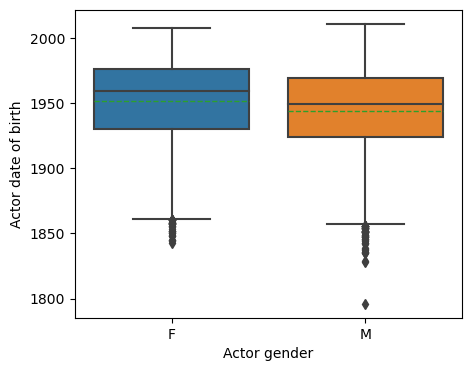

In [85]:
# Print distribution of actors gender over mean birth year with confidence interval
plt.figure(figsize=(5,4))
sns.boxplot(x='Actor gender', y='Actor date of birth', data=gender_birth, showmeans=True, meanline=True)

# Movies analysis

In [ ]:
# Select movies with actors we know the genders (common movies between charactere and movie dataframes)

movie_filtered=movie_df[movie_df['Freebase movie ID'].isin(char_df['Freebase movie ID'])]
print('Number of movies :', movie_filtered['Freebase movie ID'].nunique())

Number of movies : 63652


In [ ]:
# Associate charactere and movie dataframes on movie ID
char_movie=pd.merge(char_df, movie_filtered, on='Freebase movie ID', how='inner')
char_movie.shape

(405060, 24)

More movies in char_movie because several actors per movies

## Analysis of gender repartition over movies country

In [ ]:
# Drop null values
gender_country=char_movie[['Freebase movie ID', 'Actor gender','Freebase actor ID','Countries']].dropna()
# Drop empty dictionnary strings in country column
gender_country=gender_country[gender_country['Countries']!='[]'] 

In [ ]:
# Select 16 most common countries
most_common_country=gender_country['Countries'].value_counts()[:16]
# Select movies with most common countries
movies_from_common_countries=gender_country['Countries'].isin(most_common_country.index)
#gender_country[movies_from_common_countries]['Movie countries'].nunique()


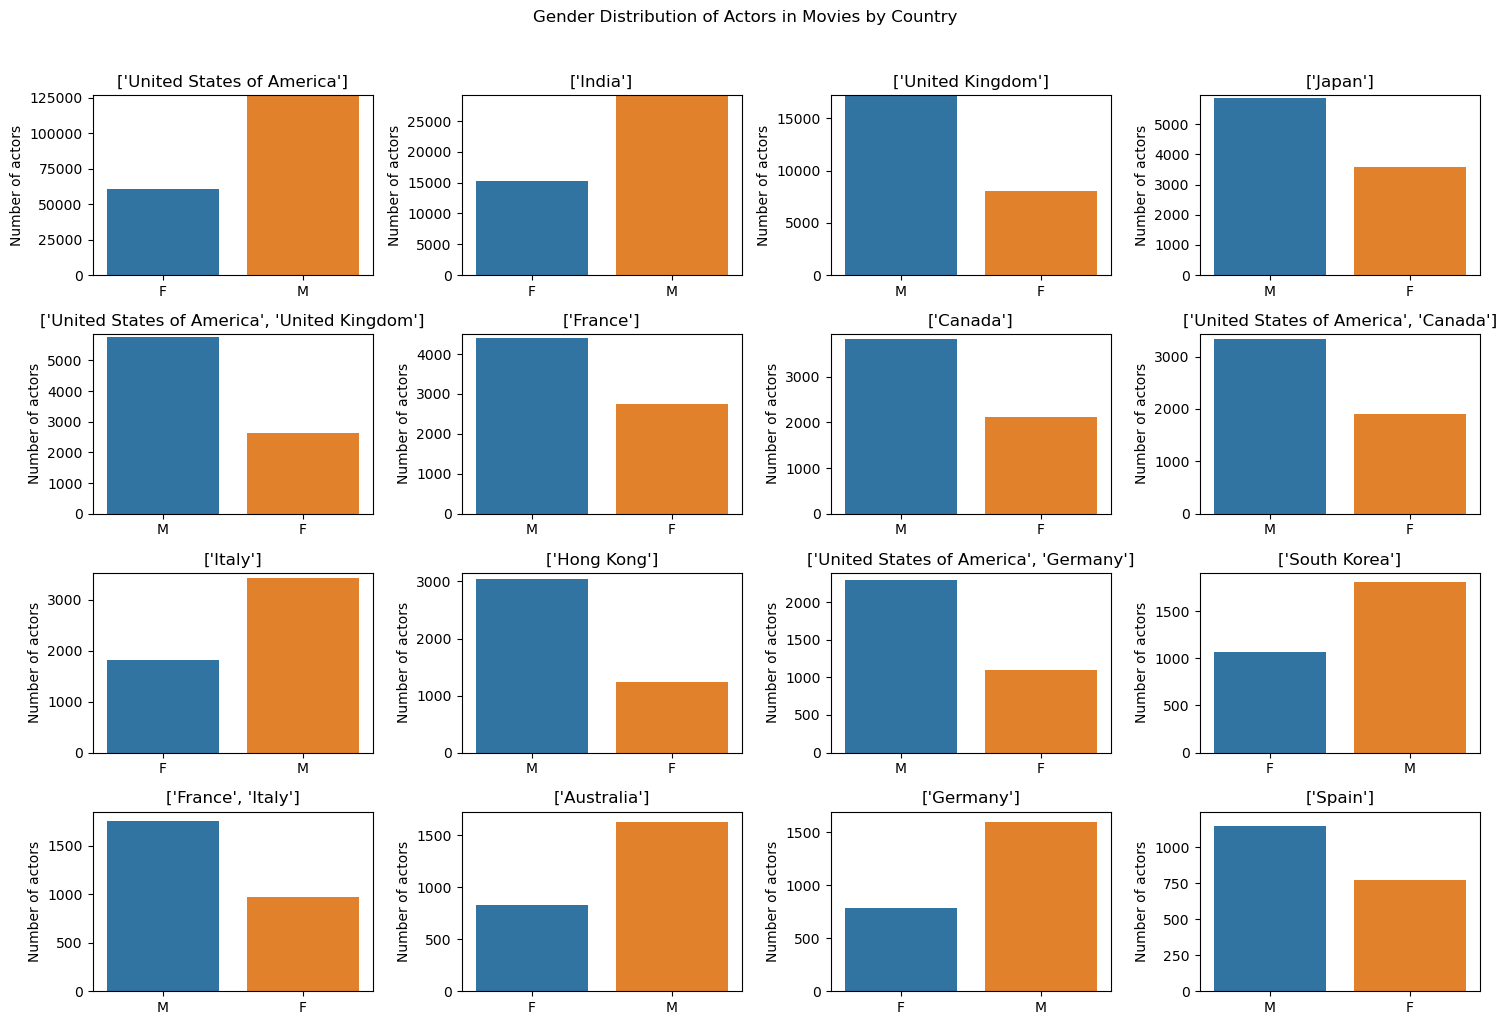

In [ ]:
# Print the gender repartition in the movies from the 16 most common countries
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10), sharey=False)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each country and create countplots
for i, country in enumerate(most_common_country.index):
    ax = axes[i]
    country_data = gender_country[gender_country['Countries'] == country]
    sns.countplot(x='Actor gender', data=country_data, ax=ax)
    ax.set_title(country)
    ax.set_xlabel('')  # Clear x-axis label for better aesthetics
    ax.set_ylabel('Number of actors')
    # Set different y-axis scales for each subplot
    ax.set_ylim(0, country_data['Actor gender'].value_counts().max() + 100)


# Set common title for the entire plot
plt.suptitle('Gender Distribution of Actors in Movies by Country', y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

To be improved into normalized percentage barplot with countries in x 

In [ ]:
gender_country.head(3)

,Freebase movie ID,Actor gender,Freebase actor ID,Countries
0,/m/03vyhn,F,/m/03wcfv7,['United States of America']
1,/m/03vyhn,F,/m/0346l4,['United States of America']
2,/m/03vyhn,M,/m/01vw26l,['United States of America']


In [ ]:
# Stack barplot gender per country of movies
gender_country_filtered=gender_country[gender_country['Countries'].isin(most_common_country.index)]
gender_country_filtered.groupby('Countries').apply(list)



Countries
['Australia']                                     [Freebase movie ID, Actor gender, Freebase act...
['Canada']                                        [Freebase movie ID, Actor gender, Freebase act...
['France', 'Italy']                               [Freebase movie ID, Actor gender, Freebase act...
['France']                                        [Freebase movie ID, Actor gender, Freebase act...
['Germany']                                       [Freebase movie ID, Actor gender, Freebase act...
['Hong Kong']                                     [Freebase movie ID, Actor gender, Freebase act...
['India']                                         [Freebase movie ID, Actor gender, Freebase act...
['Italy']                                         [Freebase movie ID, Actor gender, Freebase act...
['Japan']                                         [Freebase movie ID, Actor gender, Freebase act...
['South Korea']                                   [Freebase movie ID, Actor gender, Freeba